<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/Banking%20Dataset%20Analysis%20and%20Classification/bank_eda_starting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries & data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
pd.options.mode.chained_assignment = None

train = pd.read_csv('/content/Train-Set.csv')
test = pd.read_csv('/content/Test-Set.csv')
test_ids = test['id']

# train['education']=train['education'].replace({'illiterate':5 , 'primary':4, 'basic.4y':4 , 'basic.6y':4 , 'basic.9y':4, 'secondary':2, 'high.school':2, 'professional.course':3, 'tertiary':1, 'university.degree':1 , 'unknown':-1 })
# test['education']=test['education'].replace({'illiterate':5 , 'primary':4, 'basic.4y':4 , 'basic.6y':4 , 'basic.9y':4, 'secondary':2, 'high.school':2, 'professional.course':3, 'tertiary':1, 'university.degree':1 , 'unknown':-1 })
# train['default']=train['default'].replace({ 'no':0 , 'yes':1 , 'unknown':2})
# test['default']=test['default'].replace({ 'no':0 , 'yes':1, 'unknown':2})
# train['housing']=train['housing'].replace({ 'no':0 , 'yes':1 , 'unknown':2})
# test['housing']=test['housing'].replace({ 'no':0 , 'yes':1, 'unknown':2})
# train['loan']=train['loan'].replace({ 'no':0 , 'yes':1 , 'unknown':2})
# test['loan']=test['loan'].replace({ 'no':0 , 'yes':1, 'unknown':2})
# train['contact']=train['contact'].replace({ 'telephone':0 , 'cellular':1 , 'unknown':2})
# test['contact']=test['contact'].replace({ 'telephone':0 , 'cellular':1, 'unknown':2})
tr=train.copy()
te=test.copy()

for i, j in enumerate(train['day']):
    if j in ['apr', 'aug', 'may', 'nov' , 'sep' , 'jul', 'mar', 'dec', 'jun', 'oct' , 'jan' , 'feb']:
        train['month'][i] = j

for i, j in enumerate(test['day']):
    if j in ['apr', 'aug', 'may', 'nov' , 'sep' , 'jul', 'mar', 'dec', 'jun', 'oct' , 'jan', 'feb']:
        test['month'][i] = j

train.drop([ 'id' , 'balance' ], axis=1, inplace=True)
test.drop(['id' , 'balance'], axis=1, inplace=True)


In [ ]:
for i, j in enumerate(tr['month']):
    if j not in ['apr', 'aug', 'may', 'nov' , 'sep' , 'jul', 'mar', 'dec', 'jun', 'oct' , 'jan' , 'feb']:
        train['day'][i] = j

for i, j in enumerate(te['month']):
    if j not in ['apr', 'aug', 'may', 'nov' , 'sep' , 'jul', 'mar', 'dec', 'jun', 'oct', 'jan' , 'feb']:
        test['day'][i] = j

In [ ]:
bins = [0, 25, 35, 45, 55, 100]
train['binned'] = pd.cut(train['age'], bins, labels=[1,2,3,4,5])
test['binned'] = pd.cut(test['age'], bins, labels=[1,2,3,4,5])
train['binned'] = train['binned'].astype(int)
test['binned'] = test['binned'].astype(int)

In [ ]:
f = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact',
        'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'Target']

X = train.drop('Target', axis=1)
y = train['Target']

# correlation

In [ ]:
# !pip install dython
# from dython import nominal
# nominal.associations(zz,figsize=(20,20),mark_columns=True);
# plt.show()

In [ ]:
# train['job'] = train['job'].replace({'unknown':0, 'unemployed':1, 'housemaid':2, 'retired':3, 'self-employed':4, 'services':5, 'technician':6, 'management':7, 'student':8, 'admin.':9, 'blue-collar':10, 'entrepreneur':11})
# train['marital'] = train['marital'].replace({'unknown':0, 'divorced':1, 'married':2, 'single':3})
# train['month'] = train['month'].replace({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
# train['poutcome'] = train['poutcome'].replace({'unknown':0, 'failure':1, 'other':2, 'success':3, 'nonexistent':4})

# test['job'] = test['job'].replace({'unknown':0, 'unemployed':1, 'housemaid':2, 'retired':3, 'self-employed':4, 'services':5, 'technician':6, 'management':7, 'student':8, 'admin.':9, 'blue-collar':10, 'entrepreneur':11})
# test['marital'] = test['marital'].replace({'unknown':0, 'divorced':1, 'married':2, 'single':3})
# test['month'] = test['month'].replace({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
# test['poutcome'] = test['poutcome'].replace({'unknown':0, 'failure':1, 'other':2, 'success':3, 'nonexistent':4})


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54712 non-null  int64 
 1   age         54712 non-null  int64 
 2   job         54712 non-null  object
 3   marital     54712 non-null  object
 4   education   54712 non-null  object
 5   default     54712 non-null  object
 6   housing     54712 non-null  object
 7   loan        54712 non-null  object
 8   contact     54712 non-null  object
 9   day         54712 non-null  object
 10  month       54712 non-null  object
 11  duration    54712 non-null  int64 
 12  campaign    54712 non-null  int64 
 13  pdays       54712 non-null  int64 
 14  previous    54712 non-null  int64 
 15  poutcome    54712 non-null  object
 16  binned      54712 non-null  int64 
dtypes: int64(7), object(10)
memory usage: 7.1+ MB


In [ ]:
X_numbers = X.select_dtypes('number')
X_numbers[X_numbers<0] = 0
y = y.map({'no':0, 'yes':1})


In [ ]:
X_numbers

,Unnamed: 0,age,duration,campaign,pdays,previous,binned
0,56963,47,583,2,999,1,4
1,31753,48,725,3,0,0,4
2,60854,38,74,2,999,0,3
3,34207,50,24,3,0,0,4
4,73066,54,904,3,999,0,4
...,...,...,...,...,...,...,...
54707,21243,35,233,12,0,0,2
54708,45891,31,636,6,999,0,2
54709,42613,35,261,2,0,0,2
54710,43567,70,149,2,182,1,5


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features = SelectKBest(chi2, k=6) #number of columns
fit = best_features.fit(X_numbers, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_numbers.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

In [ ]:
# Which feature has the highest score will be more related to the dependent feature and choose those features for the model.
featureScores

,Specs,Score
0,Unnamed: 0,6.626449e+06
1,age,1.138818e+02
2,duration,2.282018e+06
3,campaign,8.586813e+02
4,pdays,6.603460e+04
5,previous,4.076865e+03
6,binned,5.817302e-01


## ExtraTreesClassifier

In [ ]:
#must convert all of it into number
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_numbers, y)
print(model.feature_importances_)

[0.30015411 0.11773139 0.38908939 0.07161484 0.06717472 0.03699565
 0.0172399 ]


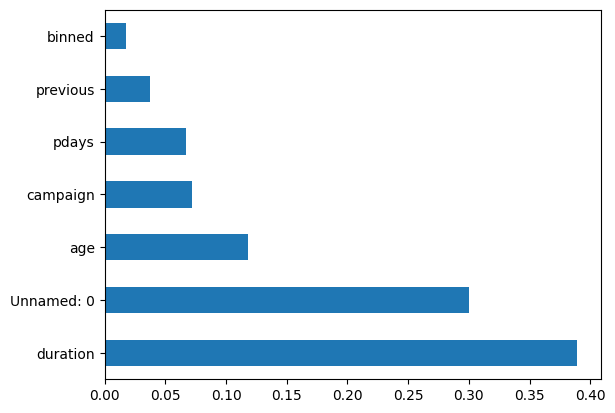

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X_numbers.columns)
feat_importances.nlargest(len(X_numbers.columns)).plot(kind='barh')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier


## One hot encoding

In [ ]:
# one hot encoding
numerical_columns = train.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test.select_dtypes(include=['number']).columns.tolist()
categorical_columns_test = test.select_dtypes(include=['object']).columns.tolist()

# one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encodings = encoder.fit_transform(train[categorical_columns_test])
encodings_df = pd.DataFrame(encodings, columns=encoder.get_feature_names_out())

train_data_encoded = pd.concat([train, encodings_df], axis=1 )
train_data_encoded  = train_data_encoded.drop(categorical_columns, axis=1)

encoding_test = encoder.transform(test[categorical_columns_test])
encoding_test = pd.DataFrame(encoding_test, columns=encoder.get_feature_names_out())
test_data_encoded = pd.concat([test, encoding_test], axis=1 )
test_data_encoded = test_data_encoded.drop(categorical_columns_test, axis=1)

train_data_encoded['Target'] = train['Target']

X = train_data_encoded.drop(['Target'],axis=1)
y = train_data_encoded['Target'].map({'no':0, 'yes':1})
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=50)


logistic = LogisticRegression(solver='liblinear', C=2.0, random_state=42)  # Common parameters
logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_test)
print('Logistic Regression', f1_score(y_test, pred_logistic , pos_label=1) )


clf_hgbc = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
pred_hgbc = clf_hgbc.predict(X_test)
print('HGBC', f1_score(y_test, pred_hgbc , pos_label=1))

rf = RandomForestClassifier(max_depth=50, random_state=10).fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print('Random Forest', f1_score(y_test, pred_rf, pos_label=1))

base_clf = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=150, random_state=42)
bagging_clf.fit(X_train, y_train)
pred_dec = bagging_clf.predict(X_test)
print('Decision Tree', f1_score(y_test, pred_dec , pos_label=1))

x= XGBClassifier( eval_metric='logloss', random_state=42, learning_rate=0.2, n_jobs=4,)
x.fit(X_train, y_train)
pred_xg = x.predict(X_test)
print('xgboos', f1_score(y_test, pred_xg , pos_label=1))


Logistic Regression 0.8237639553429028
HGBC 0.8750952018278751
Random Forest 0.8708317362974319


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree 0.8739495798319328
xgboos 0.8786835055491771


In [ ]:
#Save Model
predictions = clf_hgbc.predict(test_data_encoded)

# y_preds=[1 if x>=0.42 else 0 for x in predictions]

results=pd.DataFrame({'id': test_ids, 'Target':predictions})
results['Target'] = results['Target']
results.to_csv('sub1_undersample_rf_withMonth_labelencoder.csv',index=False)

<Axes: xlabel='day', ylabel='count'>

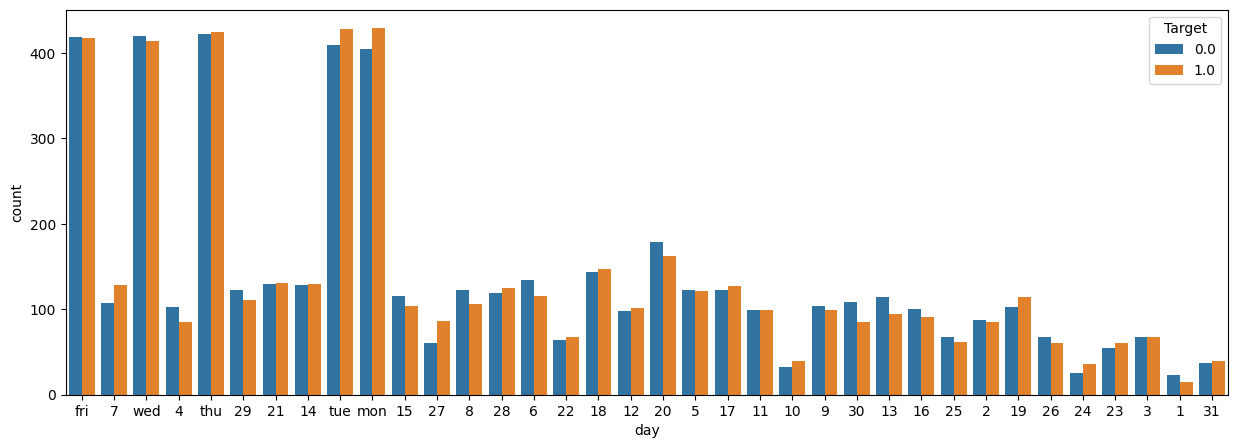

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='day',data=train, hue=y_train)

<Axes: xlabel='month', ylabel='count'>

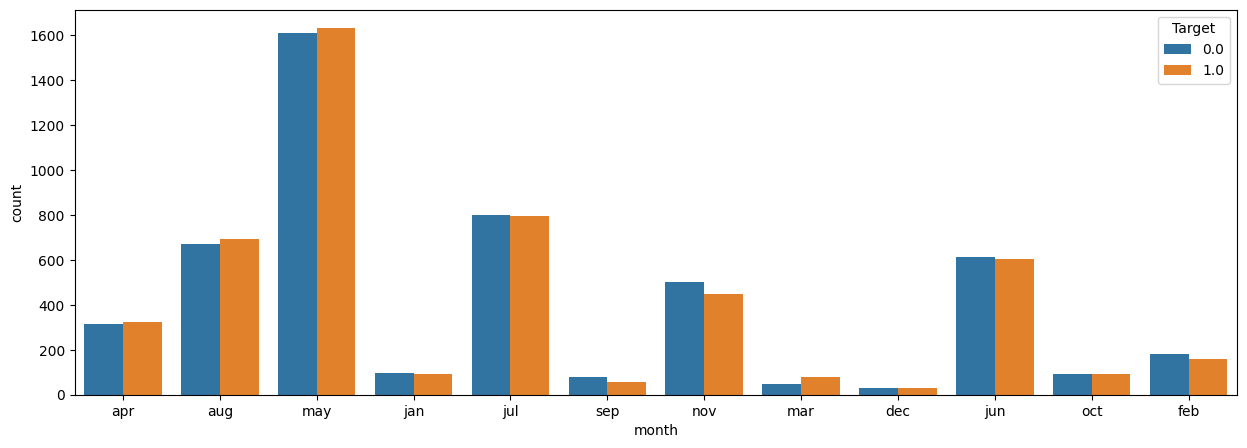

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='month',data=train, hue=y_train)

<Axes: xlabel='job', ylabel='count'>

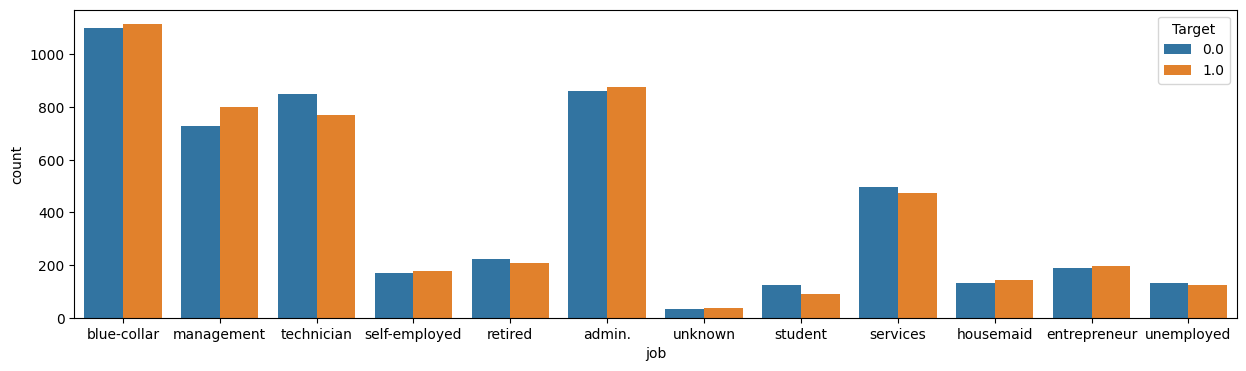

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x='job',data=train, hue=y_train)

<Axes: xlabel='education', ylabel='count'>

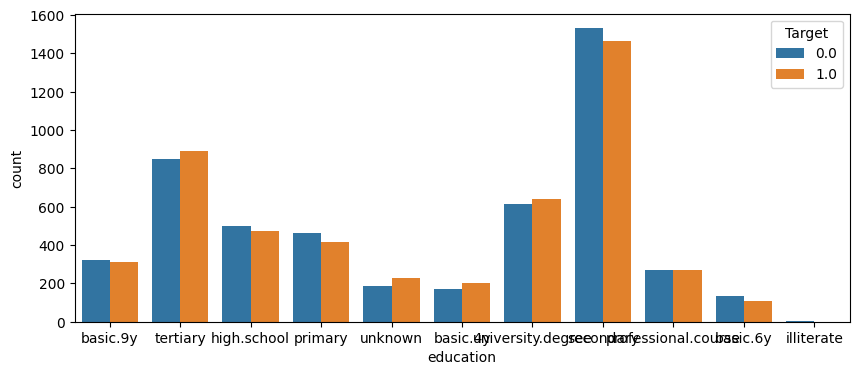

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='education',data=train, hue=y_train)

<Axes: xlabel='marital', ylabel='count'>

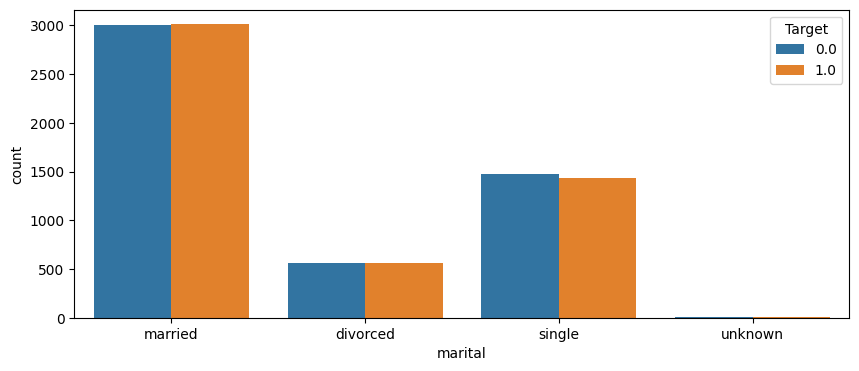

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='marital',data=train, hue=y_train)

<Axes: xlabel='education', ylabel='count'>

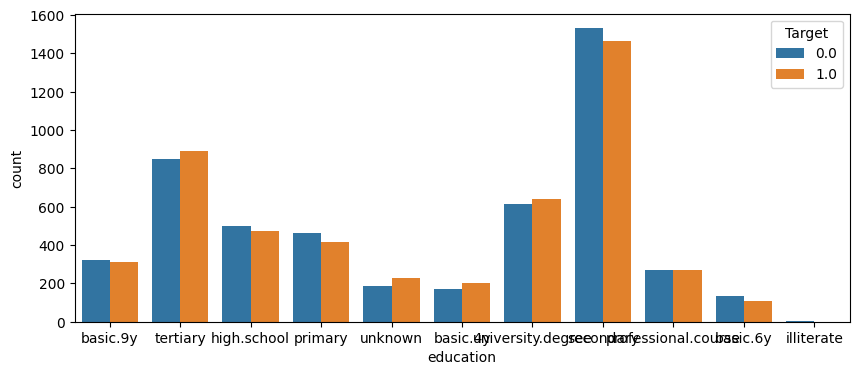

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='education',data=train, hue=y_train)

<Axes: xlabel='default', ylabel='count'>

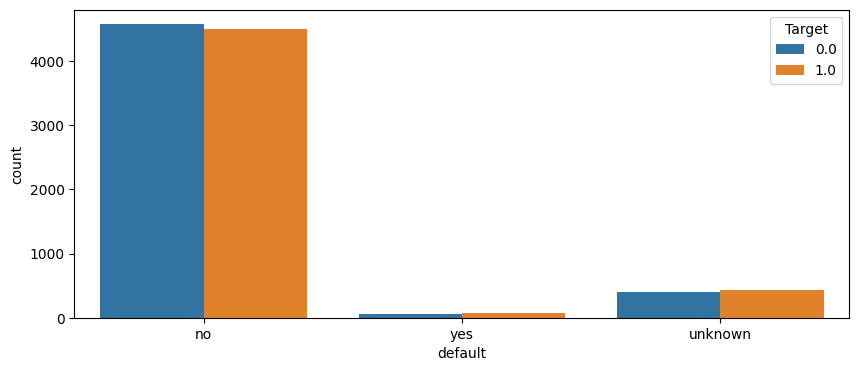

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='default',data=train, hue=y_train)

<Axes: xlabel='housing', ylabel='count'>

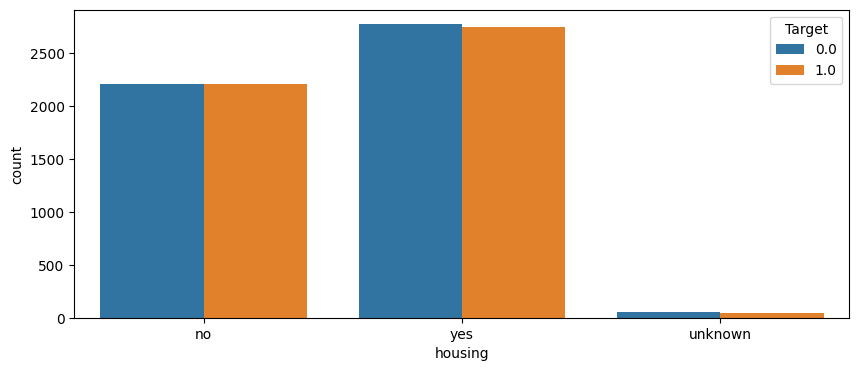

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='housing',data=train, hue=y_train)

<Axes: xlabel='loan', ylabel='count'>

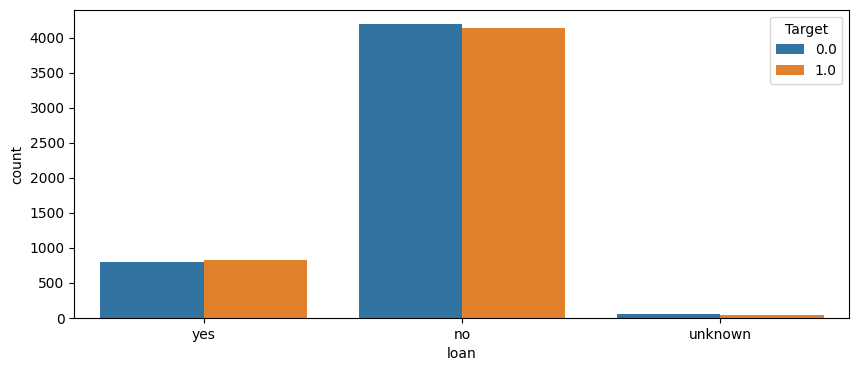

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='loan',data=train, hue=y_train)

<Axes: xlabel='contact', ylabel='count'>

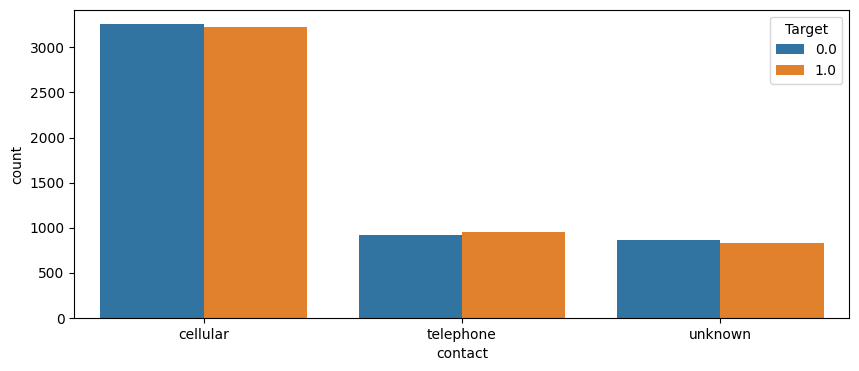

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='contact',data=train, hue=y_train)

<Axes: xlabel='binned', ylabel='count'>

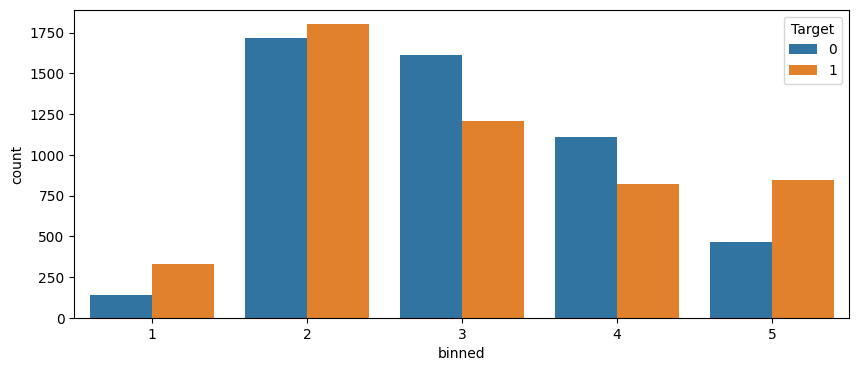

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='binned',data=X_train, hue=y_train)

<Axes: xlabel='poutcome', ylabel='count'>

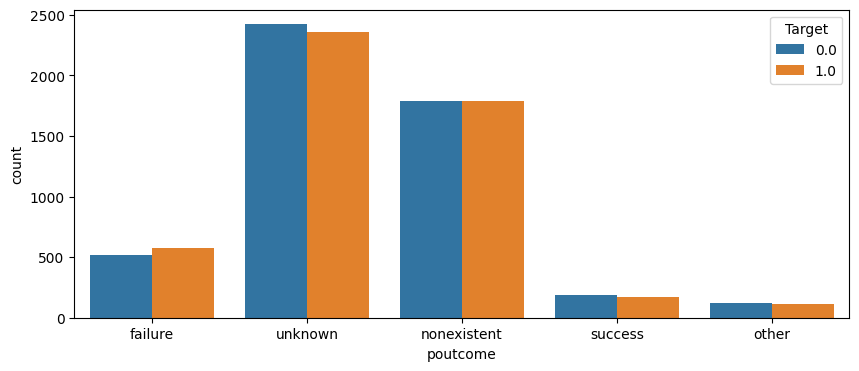

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='poutcome',data=train, hue=y_train)

<Axes: xlabel='duration', ylabel='Count'>

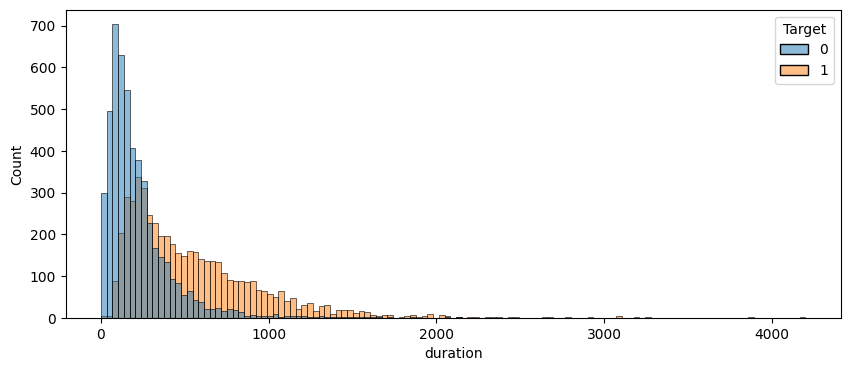

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='duration',data=X_train, hue=y_train)

<Axes: xlabel='campaign', ylabel='Count'>

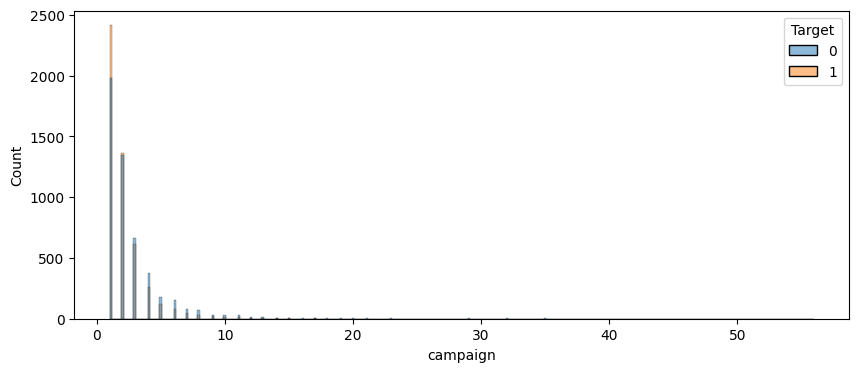

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='campaign',data=X_train, hue=y_train)

<Axes: xlabel='previous', ylabel='Count'>

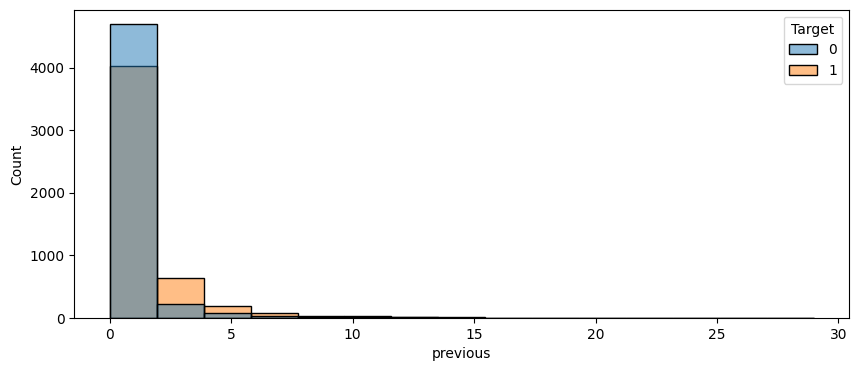

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='previous',data=X_train, hue=y_train)

<Axes: xlabel='age', ylabel='Count'>

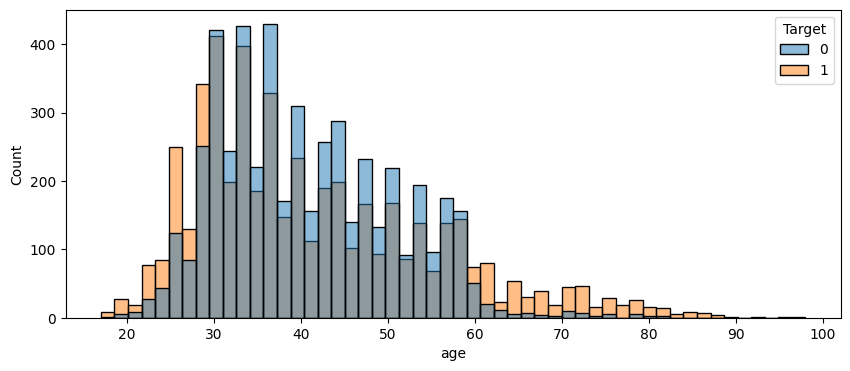

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='age',data=X_train, hue=y_train)

# CAT Boost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.1 MB/s eta 0:00:00


In [ ]:
train.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'Target', 'binned'],
      dtype='object')

In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=200, depth=8, learning_rate=0.1,
                           loss_function='Logloss', custom_metric=['AUC'], random_seed=42)

cat_model.fit(X_train, y_train)

pred_cat=cat_model.predict(X_test)
print('cat', f1_score(y_test, pred_cat , pos_label=1))


0:	learn: 0.6102193	total: 58.2ms	remaining: 11.6s
1:	learn: 0.5605156	total: 67.9ms	remaining: 6.72s
2:	learn: 0.5183946	total: 76.4ms	remaining: 5.02s
3:	learn: 0.4819948	total: 84.9ms	remaining: 4.16s
4:	learn: 0.4567032	total: 93.4ms	remaining: 3.64s
5:	learn: 0.4343383	total: 102ms	remaining: 3.31s
6:	learn: 0.4148519	total: 111ms	remaining: 3.07s
7:	learn: 0.4003355	total: 120ms	remaining: 2.88s
8:	learn: 0.3869467	total: 129ms	remaining: 2.73s
9:	learn: 0.3770943	total: 137ms	remaining: 2.61s
10:	learn: 0.3692836	total: 146ms	remaining: 2.51s
11:	learn: 0.3603070	total: 155ms	remaining: 2.42s
12:	learn: 0.3544332	total: 163ms	remaining: 2.35s
13:	learn: 0.3481353	total: 172ms	remaining: 2.28s
14:	learn: 0.3440107	total: 180ms	remaining: 2.23s
15:	learn: 0.3391149	total: 189ms	remaining: 2.17s
16:	learn: 0.3352368	total: 198ms	remaining: 2.13s
17:	learn: 0.3325349	total: 206ms	remaining: 2.08s
18:	learn: 0.3283359	total: 215ms	remaining: 2.04s
19:	learn: 0.3246495	total: 223ms	re

In [ ]:
numerical_columns = train.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test.select_dtypes(include=['number']).columns.tolist()
categorical_columns_test = test.select_dtypes(include=['object']).columns.tolist()

# one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encodings = encoder.fit_transform(train[categorical_columns_test])
encodings_df = pd.DataFrame(encodings, columns=encoder.get_feature_names_out())

train_data_encoded = pd.concat([train, encodings_df], axis=1 )
train_data_encoded  = train_data_encoded.drop(categorical_columns, axis=1)

encoding_test = encoder.transform(test[categorical_columns_test])
encoding_test = pd.DataFrame(encoding_test, columns=encoder.get_feature_names_out())
test_data_encoded = pd.concat([test, encoding_test], axis=1 )
test_data_encoded = test_data_encoded.drop(categorical_columns_test, axis=1)

train_data_encoded['Target'] = train['Target']
# train_data_encoded = pd.get_dummies(train, columns=categorical_columns_test, drop_first=True)
# test_data_encoded = pd.get_dummies(test, columns=categorical_columns_test, drop_first=True)


In [ ]:
train_data_encoded.shape , test_data_encoded.shape

((54712, 100), (23449, 99))

In [ ]:
X = train_data_encoded.drop(['Target'],axis=1)
y = train_data_encoded['Target'].map({'no':0, 'yes':1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=50)
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=0)  # Common parameters
model.fit(X_train, y_train)
pred_logistic = model.predict(X_test)

print('Logistic Regression')
print("precision_score", precision_score(y_test, pred_logistic, pos_label=1))
print("recall_score", recall_score(y_test, pred_logistic , pos_label=1))
print("accuracy_score", accuracy_score(y_test, pred_logistic ))
print("F1 score:", f1_score(y_test, pred_logistic , pos_label=1))

Logistic Regression
precision_score 0.8471708090957165
recall_score 0.8449367088607594
accuracy_score 0.845276008492569
F1 score: 0.8460522841299181


In [ ]:
#Save Model
y_pred = x.predict_proba(test_data_encoded)
y_pred = y_pred[:, 1]
y_preds=[1 if x>=0.43 else 0 for x in y_pred]

results=pd.DataFrame({'id': test_ids, 'Target':y_preds})
results['Target'] = results['Target']
results.to_csv('sub3_xgboost.csv',index=False)

In [ ]:
pp , rr, aa, ff = [], [], [], []
for i in np.linspace(0, 1, 50):
    y_pred = cat_model.predict_proba(X_test)
    y_pred = y_pred[:, 1]
    y_preds=[1 if x>=i else 0 for x in y_pred]

    p=precision_score(y_test, y_preds, pos_label=1)
    r=recall_score(y_test, y_preds , pos_label=1)
    a=accuracy_score(y_test, y_preds )
    f=f1_score(y_test, y_preds , pos_label=1)
    pp.append(p)
    rr.append(r)
    aa.append(a)
    ff.append(f)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


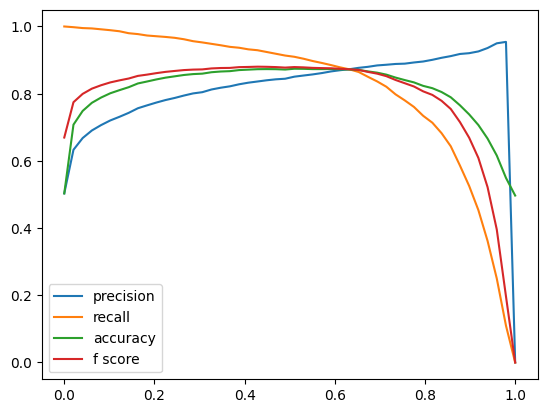

In [ ]:
a=np.linspace(0, 1, 50)
sns.lineplot(x=a,y=pp, label='precision' )
sns.lineplot(x=a,y=rr, label='recall')
sns.lineplot(x=a,y=aa, label='accuracy')
sns.lineplot(x=a,y=ff, label='f score')
plt.legend()
